In [1]:
# Import statements
import numpy as np
import pandas as pd
from random import randint
import matplotlib.pyplot as plt

In [2]:
def simulate_scratches():
    '''Simulate choosing of scratches, 4 unique values that are the result of the sum of 2 dice'''
    
    # Define keys to be the scratches for 5/10/15/20 cents
    keys = [0.05, 0.10, 0.15, 0.20]
    
    # Create empty list of values to be populated below
    values = []
    
    # While the length of values is less than 4...
    while len(values) < 4:
        # Simulate rollowing of 2 dice and taking sum
        dice = np.random.randint(low = 1, high = 7, size = 2).sum()
        # If the summed value is not already in values, append it to the list
        if dice not in values:
            values.append(dice)
    
    # Create scratches dictionary
    scratches = dict(zip(keys, values))   
    
    # Print scratches dictionary
    print(f"Scratches are {scratches}")
    return(scratches)

In [3]:
# Test simulate scratches function
scratches = simulate_scratches()

Scratches are {0.05: 4, 0.1: 7, 0.15: 9, 0.2: 8}


In [4]:
def simulate_gameplay():
    '''docstring'''
    
    # Set up racetrack with all horses starting at 0
    racetrack = {i:0 for i in range(2,13)}
    
    # Simulate scratches
    scratches = simulate_scratches()
    
    # Scratches in hand pay into pot (assuming all cards dealt even if uneven between players)
    pot = 0.05*4 + 0.10*4 + 0.15*4 + 0.20*4
    
    keys = range(2,13)
    values = [6, 7, 8, 9, 10, 11, 10, 9, 8, 7, 6]
    finish_line = dict(zip(keys, values))
    
    while True:
        # Roll dice
        dice = np.random.randint(low = 1, high = 7, size = 2).sum()
        print(f"Roll is {dice}.")

        # If roll is one of the scraches pay into the pot
        if dice in scratches.values():
            pot += float(list(scratches.keys())[list(scratches.values()).index(dice)])
            print(f"Pot increases to {round(pot, 2)}")
        else:
            racetrack[dice] += 1
            print(f"Racetrack moves {racetrack}")
            if racetrack[dice] == finish_line[dice]:
                winner = dice
                print(f"The winner is {winner}")
                break
                
    return(scratches, winner, round(pot, 2))

In [5]:
simulate_gameplay()

Scratches are {0.05: 8, 0.1: 11, 0.15: 7, 0.2: 2}
Roll is 7.
Pot increases to 2.15
Roll is 10.
Racetrack moves {2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 1, 11: 0, 12: 0}
Roll is 9.
Racetrack moves {2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 1, 11: 0, 12: 0}
Roll is 5.
Racetrack moves {2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 1, 10: 1, 11: 0, 12: 0}
Roll is 5.
Racetrack moves {2: 0, 3: 0, 4: 0, 5: 2, 6: 0, 7: 0, 8: 0, 9: 1, 10: 1, 11: 0, 12: 0}
Roll is 3.
Racetrack moves {2: 0, 3: 1, 4: 0, 5: 2, 6: 0, 7: 0, 8: 0, 9: 1, 10: 1, 11: 0, 12: 0}
Roll is 6.
Racetrack moves {2: 0, 3: 1, 4: 0, 5: 2, 6: 1, 7: 0, 8: 0, 9: 1, 10: 1, 11: 0, 12: 0}
Roll is 11.
Pot increases to 2.25
Roll is 8.
Pot increases to 2.3
Roll is 10.
Racetrack moves {2: 0, 3: 1, 4: 0, 5: 2, 6: 1, 7: 0, 8: 0, 9: 1, 10: 2, 11: 0, 12: 0}
Roll is 9.
Racetrack moves {2: 0, 3: 1, 4: 0, 5: 2, 6: 1, 7: 0, 8: 0, 9: 2, 10: 2, 11: 0, 12: 0}
Roll is 6.
Racetrack moves {2: 0, 3: 1, 4: 0, 5: 2, 6: 2, 7: 0, 8: 0, 9: 

({0.05: 8, 0.1: 11, 0.15: 7, 0.2: 2}, 5, 3.25)

In [36]:
%%capture

# Loop through simulate_gameplay function 10000 times saving the results in list
results = []
for i in range(10000):
    result = simulate_gameplay()
    results.append(result)

In [7]:
# Create a dataframe from results
df = pd.DataFrame(results, columns=['scratches', 'winner', 'pot'])

In [8]:
# View first few lines of df
df.head()

,scratches,winner,pot
0,"{0.05: 4, 0.1: 12, 0.15: 5, 0.2: 9}",8,5.10
1,"{0.05: 8, 0.1: 5, 0.15: 12, 0.2: 9}",6,4.45
2,"{0.05: 11, 0.1: 9, 0.15: 7, 0.2: 6}",5,6.00
3,"{0.05: 5, 0.1: 11, 0.15: 4, 0.2: 8}",6,5.70
4,"{0.05: 7, 0.1: 6, 0.15: 5, 0.2: 12}",11,2.60


In [38]:
df['winner'].describe()

count    10000.000000
mean         7.009300
std          2.137819
min          2.000000
25%          5.000000
50%          7.000000
75%          9.000000
max         12.000000
Name: winner, dtype: float64

In [37]:
df['pot'].describe()

count    10000.000000
mean         4.945295
std          1.212316
min          2.250000
25%          4.100000
50%          4.800000
75%          5.650000
max         11.150000
Name: pot, dtype: float64

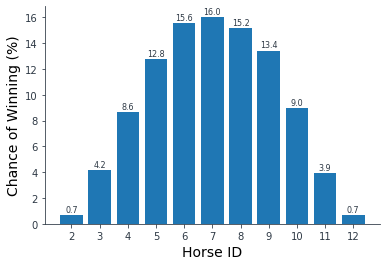

In [15]:
# Graph barplot of chance of winner for each horse

# Create figure and subplot
fig, ax = plt.subplots()

# Create barplot of chance of winner for each horse
ax.bar(df['winner'].value_counts(normalize = True).index, 
            df['winner'].value_counts(normalize = True).values*100)

# Set x-ticks so that a label appears for each horse
ax.set_xticks(range(2, 13))

# Add labels on top of the bars with chance of winning rounded to 1 decimal
ax.bar_label(p1, fontsize=8, padding = 1, fmt = '%.1f', color = '#2e3945')

# Add x and y axis labels
ax.set_xlabel('Horse ID', fontsize = 14)
ax.set_ylabel('Chance of Winning (%)', fontsize = 14)

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axes colour and width
plt.rcParams['axes.edgecolor']='#2e3945'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#2e3945'
plt.rcParams['ytick.color']='#2e3945'

# Show plot
plt.show();

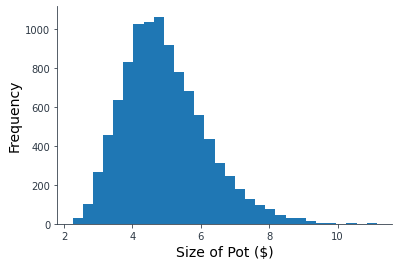

In [33]:
# Graph histogram of pot sizes

# Create figure and subplot
fig, ax = plt.subplots()

# Create histogram of pot sizes
ax.hist(df['pot'], bins = 30)

# Add x and y axis labels
ax.set_xlabel('Size of Pot ($)', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axes colour and width
plt.rcParams['axes.edgecolor']='#2e3945'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#2e3945'
plt.rcParams['ytick.color']='#2e3945'

# Show plot
plt.show();

count    10000.000000
mean         4.945295
std          1.212316
min          2.250000
25%          4.100000
50%          4.800000
75%          5.650000
max         11.150000
Name: pot, dtype: float64